## Practice Session I

#### Q1. Download the dataset from the LMS and read the dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.3.3'

In [3]:
data = pd.Series([10,20,30,40])
i = list("abcd")
data = pd.Series([10,20,30,40],i)
#type(data)
data[0:4]

a    10
b    20
c    30
d    40
dtype: int64

In [4]:
data=pd.read_csv('/home/varun/Documents/Edureka/PGDiplomaInAIAndML/PythonFundamentals-1/demos_faq_mphovutj/autodata.csv')

In [5]:
data.head()

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,?,171.2,ohcv,six,154,19,16500
3,audi,?,2824,sedan,99.8,176.6,ohc,four,102,24,13950
4,audi,5500,2507,sedan,99.4,176.6,ohc,five,115,18,17450


#### Q2. Replace ? with np.nan.

In [140]:
data.replace('?',np.nan,inplace=True)

#### Q3. Find the total number of empty values in the dataset

In [7]:
data.isna().sum().sum()

50

In [8]:
sum(data.isna().sum())

50

#### Q4. Replace all the empty values by mean while dealing with numerical data and with mode while dealing with categorical data

In [141]:
data.head()

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,NaN,171.2,ohcv,six,154,19,16500
3,audi,NaN,2824,sedan,99.8,176.6,ohc,four,102,24,13950
4,audi,5500,2507,sedan,99.4,176.6,ohc,five,115,18,17450


In [10]:
data.isna().sum()

make                 7
peak-rpm            10
curb-weight          4
body-style           3
wheel-base          10
length               0
engine-type          4
num-of-cylinders     3
horsepower           3
city-mpg             1
price                5
dtype: int64

In [142]:
def get_mean(data):
    x=np.array(data.dropna().values,float)
    return x.mean()

In [143]:
data.make.fillna(data.make.mode()[0],inplace=True)
data['peak-rpm'].fillna(get_mean(data['peak-rpm']),inplace=True)
data['curb-weight'].fillna(get_mean(data['curb-weight']),inplace=True)
data['body-style'].fillna(data['body-style'].mode()[0],inplace=True)
data['wheel-base'].fillna(get_mean(data['wheel-base']),inplace=True)
data['engine-type'].fillna(data['engine-type'].mode()[0],inplace=True)
data['num-of-cylinders'].fillna(data['num-of-cylinders'].mode()[0],inplace=True)
data.horsepower.fillna(get_mean(data.horsepower),inplace=True)
data['city-mpg'].fillna(get_mean(data['city-mpg']),inplace=True)
data.price.fillna(get_mean(data.price),inplace=True)

#### Q5. Check if there any outliers in the dataset. If any, remove them.

In [144]:
data.dtypes

make                 object
peak-rpm             object
curb-weight          object
body-style           object
wheel-base           object
length              float64
engine-type          object
num-of-cylinders     object
horsepower           object
city-mpg             object
price                object
dtype: object

In [52]:
data.head()

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,99.0667,171.2,ohcv,six,154,19,16500
3,audi,5345.1,2824,sedan,99.8,176.6,ohc,four,102,24,13950
4,audi,5500,2507,sedan,99.4,176.6,ohc,five,115,18,17450


In [145]:
data['peak-rpm']=data['peak-rpm'].astype(float)
data['curb-weight']=data['curb-weight'].astype(float)
data['wheel-base']=data['wheel-base'].astype(float)
data['city-mpg']=data['city-mpg'].astype(float)
data['price']=data['price'].astype(float)

<AxesSubplot:>

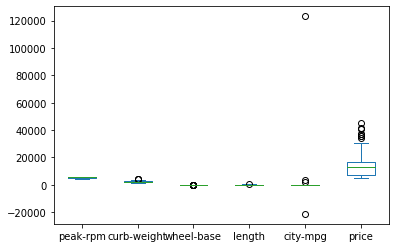

In [16]:
data.plot(kind='box')

##### There are outliers

#### Price Column

In [17]:
Q1 = data['price'].quantile(0.25)
Q3 = data['price'].quantile(0.75)
IQR = Q3 - Q1


In [18]:
# Let's see which entries are outliers
outliers=data[(data['price'] < (Q1 - 1.5 * IQR)) |(data['price'] > (Q3 + 1.5 * IQR))]

In [19]:
outliers

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
11,bmw,4250.000000,2710.000000,sedan,103.5,193.8,ohc,six,182,16.0,41315.0
12,bmw,4250.000000,2765.000000,sedan,110.0,197.0,ohc,six,182,15.0,36880.0
25,jaguar,5345.098039,1989.000000,sedan,113.0,199.6,dohc,six,176,15.0,35550.0
26,jaguar,5500.000000,2450.842105,sedan,102.0,191.7,ohcv,twelve,262,13.0,36000.0
34,mercedes-benz,5345.098039,2010.000000,sedan,120.9,208.1,ohcv,eight,21312,14.0,40960.0
35,mercedes-benz,6000.000000,2024.000000,hardtop,112.0,199.2,ohcv,eight,184,14.0,45400.0
45,porsche,5000.000000,2734.000000,hardtop,89.5,168.9,ohcf,six,12123,17.0,34028.0
46,porsche,4750.000000,4066.000000,convertible,89.5,168.9,ohcf,six,207,17.0,37028.0


In [20]:
data.drop(outliers.index,inplace=True,axis=0)

<AxesSubplot:>

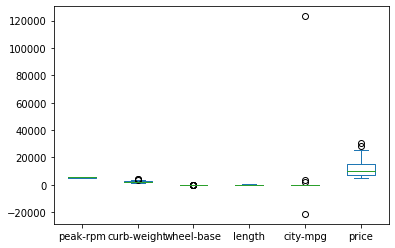

In [21]:
data.plot(kind='box')

#### Q6. Save the DataFrame as autodata_cleaned.csv

In [22]:
data.to_csv('/home/varun/Documents/Edureka/PGDiplomaInAIAndML/PythonFundamentals-1/demos_faq_mphovutj/autodata_cleaned.csv',index=False)

## Practice Session II

#### Q1. Read both autodata.csv and autodata_cleaned.csv

In [23]:
data=pd.read_csv('/home/varun/Documents/Edureka/PGDiplomaInAIAndML/PythonFundamentals-1/demos_faq_mphovutj/autodata.csv')

In [24]:
cata=pd.read_csv('/home/varun/Documents/Edureka/PGDiplomaInAIAndML/PythonFundamentals-1/demos_faq_mphovutj/autodata_cleaned.csv')

#### Q2. Group the data by make and find average curb-weight, city mpg, horsepower and peak  rpm for both the datasets

In [112]:
#sum(data[data['curb-weight'].notna()].groupby('curb-weight').agg(np.mean)['curb-weight'].astype(int))
#[data[data[data['curb-weight'].notna()]['curb-weight']=='?'].isna().any()] #['curb-weight'].isna().any() #.groupby('curb-weight').agg(np.mean)['curb-weight'].astype(int)
#sum(data[data['curb-weight'].notna()]['length'])/len(data['curb-weight'].notna())
#print(str(sum(data.groupby('curb-weight')['length'])/len(data.groupby('curb-weight'))) +' '+
#      str(sum(cata.groupby('curb-weight').agg(np.mean)['length'].astype(float))))
sum(data[data['curb-weight']!='?'].groupby('curb-weight').agg(np.mean)['length'])

print(str(round(sum(data[data['curb-weight']!='?'].groupby('curb-weight').agg(np.mean)['length'].astype(float)),2)) +' '+
      str(round(sum(cata[cata['curb-weight']!='?'].groupby('curb-weight').agg(np.mean)['length'].astype(float)),2)))

print(str(round(sum(data[data['city-mpg']!='?'].groupby('city-mpg').agg(np.mean)['length'].astype(float)),2)) +' '+
      str(round(sum(cata[cata['city-mpg']!='?'].groupby('city-mpg').agg(np.mean)['length'].astype(float)),2)))

print(str(round(sum(data[data['horsepower']!='?'].groupby('horsepower').agg(np.mean)['length'].astype(float)),2)) +' '+
      str(round(sum(cata[cata['horsepower']!='?'].groupby('horsepower').agg(np.mean)['length'].astype(float)),2)))

print(str(round(sum(data[data['peak-rpm']!='?'].groupby('peak-rpm').agg(np.mean)['length'].astype(float)),2)) +' '+
      str(round(sum(cata[cata['peak-rpm']!='?'].groupby('peak-rpm').agg(np.mean)['length'].astype(float)),2)))

#data.groupby('curb-weight').agg(np.mean)

8236.25 7259.55
4363.38 4126.92
5956.1 5188.0
1557.22 1529.52


#### Q3. Compare the results and change in values for each group

In [146]:
data[['make','length']]

,make,length
0,alfa-romero,168.8
1,alfa-romero,168.8
2,alfa-romero,171.2
3,audi,176.6
4,audi,176.6
...,...,...
56,volkswagen,171.7
57,volkswagen,171.7
58,bmw,171.7
59,volvo,188.8


In [147]:
data.groupby('make').agg(np.mean)

,peak-rpm,curb-weight,wheel-base,length,city-mpg,price
make,,,,,,
alfa-romero,5166.666667,2569.333333,92.088889,169.600000,20.333333,15498.333333
audi,5422.549020,2782.250000,101.200000,180.800000,20.000000,16392.500000
bmw,5303.469080,2478.898785,100.366667,175.930769,23.692308,18279.923077
chevrolet,5381.699346,3221.666667,95.511111,151.933333,41.000000,6007.000000
dodge,5250.000000,2496.500000,93.700000,157.300000,-10640.500000,6303.000000
honda,5415.032680,1886.333333,96.500000,167.200000,26.333333,10195.000000
isuzu,5500.000000,1990.333333,97.477778,160.833333,33.333333,12424.857143
jaguar,5448.366013,2296.894737,109.333333,196.966667,14.333333,28931.595238
mazda,5100.000000,2120.333333,97.033333,164.400000,31.000000,10411.333333


The requested columns are not appearing because of their datatype and they have '?' values as well. so we cannot find the average with this data.

In [148]:
cata.groupby('make').agg(np.mean)

,peak-rpm,curb-weight,wheel-base,length,horsepower,city-mpg,price
make,,,,,,,
alfa-romero,5166.666667,2569.333333,92.088889,169.600000,125.333333,20.333333,15498.333333
audi,5422.549020,2782.250000,101.200000,180.800000,109.250000,20.000000,16392.500000
bmw,5495.008913,2431.880383,99.206061,172.390909,209.067398,25.181818,14494.909091
chevrolet,5381.699346,3221.666667,95.511111,151.933333,7776.666667,41.000000,6007.000000
dodge,5250.000000,2496.500000,93.700000,157.300000,68.000000,-10640.500000,6303.000000
honda,5415.032680,1886.333333,96.500000,167.200000,92.333333,26.333333,10195.000000
isuzu,5500.000000,1990.333333,97.477778,160.833333,72.666667,33.333333,12424.857143
jaguar,5500.000000,2450.842105,113.000000,199.600000,176.000000,15.000000,15244.785714
mazda,5100.000000,2120.333333,97.033333,164.400000,69.333333,31.000000,10411.333333


Meanwhile this data has those values

In [75]:
data.head()

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000,2548,convertible,88.6,168.8,dohc,four,111,21,13495
1,alfa-romero,5000,2823,convertible,88.6,168.8,dohc,four,111,21,16500
2,alfa-romero,5500,2337,hatchback,?,171.2,ohcv,six,154,19,16500
3,audi,?,2824,sedan,99.8,176.6,ohc,four,102,24,13950
4,audi,5500,2507,sedan,99.4,176.6,ohc,five,115,18,17450


#### Q4. Group data by make and find highest priced car for each make

In [114]:
out=pd.DataFrame()
for grp, qata in cata.groupby('make'):
    qq=qata.sort_values('price').head(1)
    out=out.append(qq)


In [115]:
out

,make,peak-rpm,curb-weight,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,city-mpg,price
0,alfa-romero,5000.000000,2548.000000,convertible,88.600000,168.8,dohc,four,111.0,21.0,13495.000000
3,audi,5345.098039,2824.000000,sedan,99.800000,176.6,ohc,four,102.0,24.0,13950.000000
23,bmw,5000.000000,2535.000000,hatchback,93.100000,159.1,ohc,four,68.0,30.0,5195.000000
11,chevrolet,5345.098039,3055.000000,hatchback,88.400000,141.1,ohc,three,48.0,47.0,5151.000000
15,dodge,5100.000000,1488.000000,hatchback,93.700000,157.3,ohc,four,68.0,31.0,6229.000000
16,honda,5345.098039,1874.000000,sedan,96.500000,157.1,ohc,four,76.0,30.0,7295.000000
19,isuzu,5500.000000,1876.000000,sedan,94.300000,170.7,ohc,four,78.0,24.0,6785.000000
22,jaguar,5500.000000,2450.842105,sedan,113.000000,199.6,dohc,six,176.0,15.0,15244.785714
24,mazda,5000.000000,2811.000000,hatchback,93.100000,159.1,ohc,four,68.0,31.0,6095.000000
28,mercedes-benz,6000.000000,1940.000000,sedan,110.000000,190.9,ohc,five,123.0,123213.0,25552.000000


In [123]:
out['price'].max()

25552.0

### Q6. Scale the numerical features using StandardScaler

<AxesSubplot:>

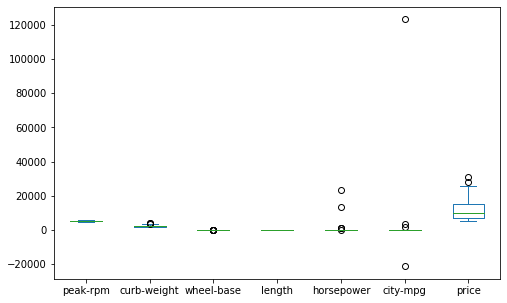

In [124]:
cata.plot(kind='box',figsize=(8,5))

In [125]:
from sklearn.preprocessing import StandardScaler

In [149]:
scl_tr=StandardScaler()
data['peak-rpm']=scl_tr.fit_transform(data[['peak-rpm']].astype('float'))

In [154]:
for i in ['peak-rpm','curb-weight','wheel-base','length','horsepower','city-mpg','price']:
    data[i]=StandardScaler().fit_transform(data[i])#.reshape(1, -1)

ValueError: Expected 2D array, got 1D array instead:
array=[-0.82878342 -0.82878342  0.37201074  0.          0.37201074  0.37201074
  0.          0.37201074  0.          1.09248723  1.09248723 -2.62997465
 -2.62997465  0.          0.13185191  0.13185191  0.13185191 -0.58862458
  0.          0.13185191  0.37201074  0.37201074  0.37201074  0.37201074
  0.37201074  0.          0.37201074 -0.82878342 -0.82878342 -1.30910108
  1.57280489  0.37201074  1.57280489  1.57280489  0.          1.57280489
  1.09248723  1.09248723  1.09248723  1.09248723  1.09248723  0.
 -1.30910108  0.13185191  0.13185191 -0.82878342 -1.42918049 -1.42918049
  0.         -0.82878342 -0.82878342 -0.82878342 -0.82878342 -0.82878342
  0.          1.57280489  1.57280489  1.57280489 -1.30910108 -1.30910108
 -1.30910108].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.